In [1]:
%matplotlib inline
from sklearn import mixture
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.interpolate import *

import scipy
from scipy import stats

In [2]:
data1 = np.loadtxt('LED_2.6V_Gain_25_grad_S13360_54V.txt').T
data2 = np.loadtxt('LED_2.6V_Gain_25_grad_S13360_55V.txt').T
data3 = np.loadtxt('LED_2.6V_Gain_25_grad_S13360_56V.txt').T
samples =500
time_0 =0
time=np.linspace(0,samples*8,samples)
pulses1 = -1000*data1[time_0:time_0+samples,:10000]
pulses2 = -1000*data2[time_0:time_0+samples,:10000]
pulses3 = -1000*data3[time_0:time_0+samples,:10000]
#pulses = -data
# Constants
t = 8e-9
gain = 92   ####### revisar estooooo####
res = 51
kte = t*1e-3/(gain*res)


In [3]:
# Baseline correction
N = len(pulses2.T)	# Number of pulses
mean1 = np.mean(pulses1[1,:])
mean2 = np.mean(pulses2[1,:])
mean3 = np.mean(pulses3[1,:])
pulses1 = pulses1 - mean1
pulses2 = pulses2 - mean2
pulses3 = pulses3- mean3
# Outliers filtering
mi1 = np.zeros(N)
mi2 = np.zeros(N)
mi3 = np.zeros(N)
pul = 0
outliers1 = []
outliers2 = []
outliers3 = []
for i in range (N):
	sum = 0
	mi1[i] = np.amin(pulses1[:,i])
	if mi1[i] > -11:
		pul = pul + 1
	else:
		outliers1.append(i) 
pul = 0
for i in range (N):
	sum = 0
	mi2[i] = np.amin(pulses2[:,i])
	if mi2[i] > -11:
		pul = pul + 1
	else:
		outliers2.append(i)   
pul = 0
for i in range (N):
	sum = 0
	mi3[i] = np.amin(pulses3[:,i])
	if mi3[i] > -11:
		pul = pul + 1
	else:
		outliers3.append(i) 
        
#print 'Number of pulses: ' + str(pul)
print 'Outliers: ' +str(len(outliers2))

Outliers: 2375


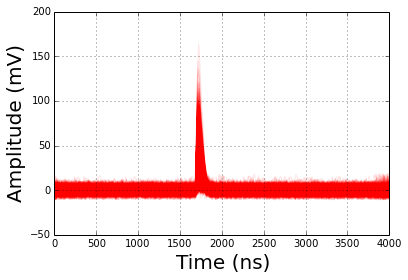

In [4]:
# señal filtrada 
pulses1=np.delete(pulses1,(outliers1),axis=1)
pulses2=np.delete(pulses2,(outliers2),axis=1)
pulses3=np.delete(pulses3,(outliers3),axis=1)
time=np.linspace(0,len(pulses1[:,1])*8,len(pulses1[:,1]))
plt.figure()
plt.plot(time,pulses1,'r',alpha=0.1)
plt.xlabel('Time (ns)', fontsize=20)
plt.ylabel('Amplitude (mV)', fontsize=20)
plt.grid(True)
#plt.ylim(-10,100)
#plt.gcf().set_size_inches(11,7)
#plt.savefig('2kPulses_Hamamatus.png')
plt.show()


In [5]:
# Pulse and charge computing
N1 = len(pulses1.T)	# Number of pulses
N2 = len(pulses2.T)
N3 = len(pulses3.T)
peak1 = np.zeros((N1,1))
peak2 = np.zeros((N2,1))
peak3= np.zeros((N3,1))
wind=209
start=0
pulsesf1=pulses1[start:start+wind,:]
pulsesf2=pulses2[start:start+wind,:]
pulsesf3=pulses3[start:start+wind,:]
for i in range (N1):
	peak1[i] = np.max(pulsesf1[:,i])
for i in range (N2):
	peak2[i] = np.max(pulsesf2[:,i])
for i in range (N3):
	peak3[i] = np.max(pulsesf3[:,i])
 



In [6]:
N1 = len(pulsesf1.T)
N2 = len(pulsesf2.T)
N3 = len(pulsesf3.T)
Th=np.linspace(0.1,3.1,500)
M=len(Th)
DC1=np.zeros(M)
DC2=np.zeros(M)
DC3=np.zeros(M)
cnt1=0;
cnt2=0;
cnt3=0;

pe1 =12.6
pe2 = 13.46
pe3 = 13.93

for i in Th:

    for j in range(N1):
        if (peak1[j] >= i*pe1):
            DC1[cnt1]+=1
    cnt1 +=1
    for j in range(N2):
        if (peak2[j] >= i*pe2):
            DC2[cnt2]+=1
    cnt2 +=1
    for j in range(N3):
        if (peak3[j] >= i*pe3):
            DC3[cnt3]+=1
    cnt3 +=1
    
DC1=DC1/(len(pulsesf1)*8e-9*len(pulses1.T)) 
DC2=DC2/(len(pulsesf2)*8e-9*len(pulses2.T)) 
DC3=DC3/(len(pulsesf3)*8e-9*len(pulses3.T)) 

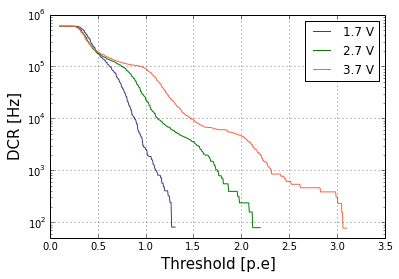

In [51]:

fig, axes = plt.subplots()
plt.semilogy(Th,DC1,'darkslateblue',label='1.7 V')
plt.semilogy(Th[:350],DC2[:350],'green',label='2.7 V')
plt.semilogy(Th,DC3,'tomato',label='3.7 V')
plt.legend()
#plt.axhline(DC[int(np.round(0.5*500/3.1))],ls=':',c='r')
#plt.axhline(DC[int(np.round(1.5*500/3.1))],ls=':',c='r')
#plt.axhline(DC[int(np.round(2.5*500/3.1))],ls=':',c='r')
axes.set_ylabel("DCR [Hz]", fontsize=15)
axes.set_xlabel("Threshold [p.e]", fontsize=15)
axes.grid(True)
#plt.title('Hamamatsu S13360-1350CS',size=10)
#plt.title('Hamamatsu S13360-1350CS',size=10)
plt.ylim(50,1e6)
plt.savefig('DCR_vs_th_1350CS.eps')
plt.show()


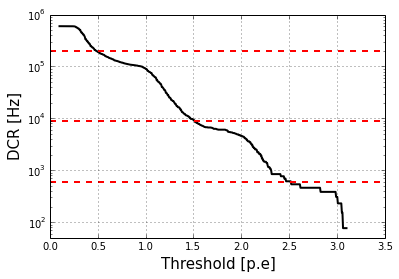

In [47]:
fig, axes = plt.subplots()
plt.semilogy(Th,DC3,'k', lw = 2)
plt.axhline(2e5, color='red', ls='--', lw = 2)
plt.axhline(0.9e4, color='red', ls='--', lw = 2)
plt.axhline(6e2, color='red', ls='--', lw = 2)
axes.set_ylabel("DCR [Hz]", fontsize=15)
axes.set_xlabel("Threshold [p.e]", fontsize=15)
axes.grid(True)
plt.ylim(50,1e6)
plt.savefig('DCR_vs_th_pe_1350CS.eps')
plt.show()

### Afterpulses

### 54 V

In [8]:
afterp1 = pulses1[300:,:N1]
beforep1 = pulses1[0:200,:N1]

In [9]:
afterpeak1 = np.zeros((N1,1))
beforepeak1 = np.zeros((N1,1))
afterpulses1 = 0
beforepulses1 = 0

for i in range (N1):
    
    afterpeak1[i] = np.max(afterp1[:,i])
    beforepeak1[i] = np.max(beforep1[:,i])
    
    if afterpeak1[i] >= (1*pe1-0.3*pe1):
        afterpulses1 +=1
    if beforepeak1[i] >= (1*pe1-0.3*pe1):
        beforepulses1 +=1
        
print(afterpulses1)
print(beforepulses1)

afPer1 = float(afterpulses1-beforepulses1)/N1*100

print afPer1

785
771
0.188273265196


### 55 V

In [10]:
afterp2 = pulses2[300:,:N2]
beforep2 = pulses2[0:200,:N2]

In [11]:
afterpeak2 = np.zeros((N2,1))
beforepeak2 = np.zeros((N2,1))
afterpulses2 = 0
beforepulses2 = 0

for i in range (N2):
    
    afterpeak2[i] = np.max(afterp2[:,i])
    beforepeak2[i] = np.max(beforep2[:,i])
    
    if afterpeak2[i] >= (1*pe2-0.3*pe2):
        afterpulses2 +=1
    if beforepeak2[i] >= (1*pe2-0.3*pe2):
        beforepulses2 +=1
        
print(afterpulses2)
print(beforepulses2)

afPer2 = float(afterpulses2-beforepulses2)/N2*100

print afPer2

1476
1406
0.918032786885


#### 56 V

In [12]:
afterp3 = pulses3[300:,:N3]
beforep3 = pulses3[0:200,:N3]

In [13]:
afterpeak3 = np.zeros((N3,1))
beforepeak3 = np.zeros((N3,1))
afterpulses3 = 0
beforepulses3 = 0

for i in range (N3):
    
    afterpeak3[i] = np.max(afterp3[:,i])
    beforepeak3[i] = np.max(beforep3[:,i])
    
    if afterpeak3[i] >= (1*pe3-0.3*pe3):
        afterpulses3 +=1
    if beforepeak3[i] >= (1*pe3-0.3*pe3):
        beforepulses3 +=1
        
print(afterpulses3)
print(beforepulses3)

afPer3 = float(afterpulses3-beforepulses3)/N3*100

print afPer3

1826
1601
2.88646568313


In [14]:
afvec = [afPer1, afPer2, afPer3]
overV = [1.7, 2.7, 3.7]

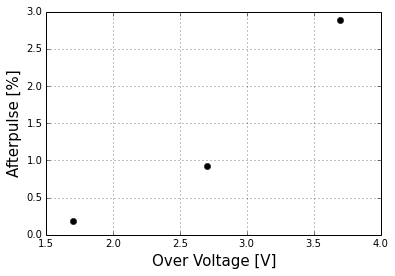

In [15]:
plt.figure()
plt.plot(overV,afvec, 'ok')
plt.ylabel("Afterpulse [%]", fontsize=15)
plt.xlabel("Over Voltage [V]", fontsize=15)
plt.grid()
plt.show()

In [16]:
paramAf = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(-b*t),  np.array(overV),  afvec,  p0=(4, 1e-9))
AAf = paramAf[0][0]
BAf = paramAf[0][1]

Over_fit = np.linspace(1,4,101)

After_fit = AAf*np.exp(-BAf*Over_fit)


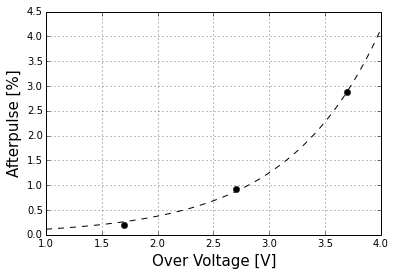

In [17]:
plt.figure()
plt.plot(overV,afvec, 'ok')
plt.plot(Over_fit, After_fit, '--k')
plt.ylabel("Afterpulse [%]", fontsize=15)
plt.xlabel("Over Voltage [V]", fontsize=15)
plt.grid()
plt.savefig('After_vs_Ov_1350CS.eps')
plt.show()

###  Crosstalk

In [18]:
Cros1 = 0
Cros2 = 0
Cros3 = 0

D1 = 0
D2 = 0
D3 = 0

for j in range(N1):
    if (peak1[j] >= 2*pe1-0.3*pe1):
        Cros1 +=1
    if (peak1[j] >= 1*pe1-0.3*pe1):
        D1 +=1

for j in range(N2):
    if (peak2[j] >= 2*pe2-0.3*pe2):
        Cros2 +=1
    if (peak2[j] >= 1*pe2-0.3*pe2):
        D2 +=1

for j in range(N3):
    if (peak3[j] >= 2*pe3-0.3*pe3):
        Cros3 +=1
    if (peak3[j] >= 1*pe3-0.3*pe3):
        D3 +=1

CrosPer1 = (float(Cros1)/D1)*100
CrosPer2 = (float(Cros2)/D2)*100
CrosPer3 = (float(Cros3)/D3)*100

In [19]:
crosVec = [CrosPer1, CrosPer2, CrosPer3]

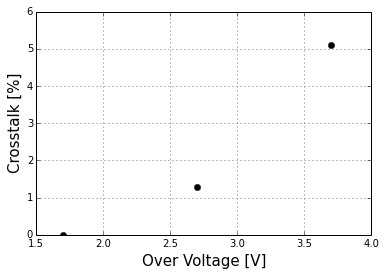

In [20]:
plt.figure()
plt.plot(overV,crosVec, 'ok')
plt.ylabel("Crosstalk [%]", fontsize=15)
plt.xlabel("Over Voltage [V]", fontsize=15)
plt.grid()
plt.show()

In [21]:
paramCros = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(-b*t),  np.array(overV),  crosVec,  p0=(4, 1e-9))
ACros = paramCros[0][0]
BCros = paramCros[0][1]

Over_fit = np.linspace(1,4,101)

Cros_fit = ACros*np.exp(-BCros*Over_fit)

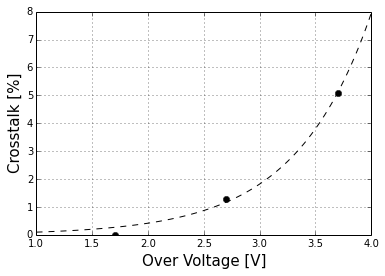

In [22]:
plt.figure()
plt.plot(overV,crosVec, 'ok')
plt.plot(Over_fit, Cros_fit, '--k')
plt.ylabel("Crosstalk [%]", fontsize=15)
plt.xlabel("Over Voltage [V]", fontsize=15)
plt.grid()
plt.savefig('Cross_vs_Ov_1350CS.eps')
plt.show()

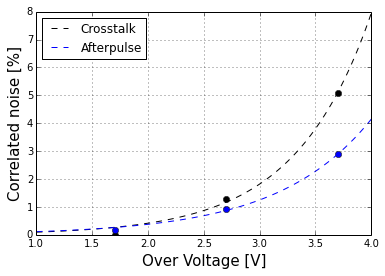

In [23]:
plt.figure()
plt.plot(overV,crosVec, 'ok')
plt.plot(overV,afvec, 'ob')
plt.plot(Over_fit, Cros_fit, '--k', label="Crosstalk")
plt.plot(Over_fit, After_fit, '--b', label="Afterpulse")
plt.ylabel("Correlated noise [%]", fontsize=15)
plt.xlabel("Over Voltage [V]", fontsize=15)
plt.legend(loc=2)
plt.grid()
plt.savefig('CorrNoise_vs_Ov_1350CS.eps')
plt.show()